## HIGH LEVEL Data Pre-Processing

In [21]:
# Initial Imports
import pandas as pd
import numpy as np
from pathlib import Path
from dotenv import load_dotenv
import time
from joblib import dump,load # Save Models
from numpy import random
import os
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
# SDK Imports
import shrimpy

In [8]:
# Set environment variables from the .env file
env_path = Path("/Users/gdepa")/'grant_api_keys.env'
load_dotenv(env_path)
# Extract API Keys from environment variables
shrimpy_dev_public_key = os.getenv("SHRIMPY_DEV_PUBLIC")
shrimpy_dev_private_key = os.getenv("SHRIMPY_DEV_SECRET")
# Shrimpy API Client
shrimpy_client = shrimpy.ShrimpyApiClient(shrimpy_dev_public_key, shrimpy_dev_private_key)

###  Shrimpy data to dataframe functions

In [19]:
# Get exchange assets and Trading Pairs from Shrimpy API
def get_base_exchange_data(exchange):
    # Get Digital Asset Data
    def get_exchange_assets(exchange):
        exchange_assets = shrimpy_client.get_exchange_assets(exchange)
        exchange_assets_df = pd.DataFrame(columns=['id','name', 'symbol', 'trading_symbol'])
        for key, value in enumerate(exchange_assets):
            exchange_assets_df.loc[key] = [value['id'], value['name'], value['symbol'], value['tradingSymbol']]
        return exchange_assets_df

    def calc_trading_pairs_df(exchange):
        exchange_pairs = shrimpy_client.get_trading_pairs(exchange)
        exchange_pairs_df = pd.DataFrame(columns=['base','quote'])
        for key, value in enumerate(exchange_pairs):
            exchange_pairs_df.loc[key] = [value['baseTradingSymbol'],value['quoteTradingSymbol']]
        return exchange_pairs_df
    return get_exchange_assets(exchange), calc_trading_pairs_df(exchange)

In [11]:
df_kucoin_assets, df_kucoin_pairs = get_base_exchange_data('kucoin')

In [12]:
df_kucoin_assets

,id,name,symbol,trading_symbol
0,38,Bitcoin,BTC,BTC
1,153,Ethereum,ETH,ETH
2,372,Tether,USDT,USDT
3,267,NEO,NEO,NEO
4,396,VeChain,VET,VET
...,...,...,...,...
227,1114,USDJ,USDJ,USDJ
228,1109,Aleph.im,ALEPH,ALEPH
229,1115,SUN,SUN,SUN
230,1119,Uniswap,UNI,UNI


## DATA CREDIT SPEND
    - do not run these cells!
---

In [11]:
# 100 Credits
df_candles_kucoin_btcusd_6h_ = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2020-01-01',
    '2020-09-25',
    10,
    '6h'
)
df_candles_kucoin_btcusd_6h_

[{'open': '7168.3000000000000000',
  'high': '7223.5000000000000000',
  'low': '7150.0000000000000000',
  'close': '7194.1000000000000000',
  'volume': '579.1641930700000000',
  'quoteVolume': 4163808.923396687,
  'time': '2020-01-01T00:00:00.000Z'},
 {'open': '7194.1000000000000000',
  'high': '7219.1000000000000000',
  'low': '7160.0000000000000000',
  'close': '7180.0000000000000000',
  'volume': '419.8303398200000000',
  'quoteVolume': 3018266.817887258,
  'time': '2020-01-01T06:00:00.000Z'},
 {'open': '7178.9000000000000000',
  'high': '7235.0000000000000000',
  'low': '7178.9000000000000000',
  'close': '7220.8000000000000000',
  'volume': '390.2634850600000000',
  'quoteVolume': 2815233.7191781215,
  'time': '2020-01-01T12:00:00.000Z'},
 {'open': '7220.6000000000000000',
  'high': '7230.7000000000000000',
  'low': '7160.0000000000000000',
  'close': '7174.4000000000000000',
  'volume': '438.3768757800000000',
  'quoteVolume': 3155335.265173694,
  'time': '2020-01-01T18:00:00.000

In [13]:
df_candles_kucoin_btcusd_6h_earliest = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2010-01-01',
    '2020-09-25',
    1,
    '6h'
)
df_candles_kucoin_btcusd_6h_earliest

[{'open': '122.0000000000000000',
  'high': '122.0000000000000000',
  'low': '122.0000000000000000',
  'close': '122.0000000000000000',
  'volume': '0.1000000000000000',
  'quoteVolume': 12.2,
  'time': '2013-10-06T18:00:00.000Z'}]

In [16]:
# 10,000 Data Credits
candles_kraken_btcusd_6h_earliest_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2013-10-06',
    '2020-09-25',
    1000,
    '6h'
)


NameError: name 'candles_kucoin_btcusd_6h_earliest_1000' is not defined

In [17]:
candles_kraken_btcusd_6h_earliest_1000

[{'open': '122.0000000000000000',
  'high': '122.0000000000000000',
  'low': '122.0000000000000000',
  'close': '122.0000000000000000',
  'volume': '0.1000000000000000',
  'quoteVolume': 12.2,
  'time': '2013-10-06T18:00:00.000Z'},
 {'open': '123.6100000000000000',
  'high': '123.6100000000000000',
  'low': '123.6100000000000000',
  'close': '123.6100000000000000',
  'volume': '0.1000000000000000',
  'quoteVolume': 12.361,
  'time': '2013-10-07T18:00:00.000Z'},
 {'open': '123.9100000000000000',
  'high': '124.1900000000000000',
  'low': '123.9000000000000000',
  'close': '124.1800000000000000',
  'volume': '3.9916000000000000',
  'quoteVolume': 495.13924,
  'time': '2013-10-08T00:00:00.000Z'},
 {'open': '124.0168700000000000',
  'high': '124.0168700000000000',
  'low': '123.8400000000000000',
  'close': '123.8400000000000000',
  'volume': '2.8230000000000000',
  'quoteVolume': 349.95406,
  'time': '2013-10-09T06:00:00.000Z'},
 {'open': '125.8500000000000000',
  'high': '125.86000000000

In [33]:
# - 10,000 Data Credits
candles_kraken_btcusd_6h_second_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2014-07-07',
    '2020-09-25',
    1000,
    '6h'
)
candles_kraken_btcusd_6h_second_1000

[{'open': '627.6240100000000000',
  'high': '638.9730000000000000',
  'low': '627.6240100000000000',
  'close': '638.9730000000000000',
  'volume': '0.5338459300000000',
  'quoteVolume': 339.9175062896889,
  'time': '2014-07-07T00:00:00.000Z'},
 {'open': '627.2266400000000000',
  'high': '632.4650100000000000',
  'low': '614.7412100000000000',
  'close': '625.9885900000000000',
  'volume': '5.9324168700000000',
  'quoteVolume': 3694.438771072606,
  'time': '2014-07-07T12:00:00.000Z'},
 {'open': '620.7504100000000000',
  'high': '626.7433300000000000',
  'low': '616.5993600000000000',
  'close': '616.5993600000000000',
  'volume': '1.1165682500000000',
  'quoteVolume': 693.8855971089107,
  'time': '2014-07-08T06:00:00.000Z'},
 {'open': '614.7419500000000000',
  'high': '626.8745200000000000',
  'low': '614.7419500000000000',
  'close': '626.8745200000000000',
  'volume': '0.3211310600000000',
  'quoteVolume': 197.4162176547911,
  'time': '2014-07-08T12:00:00.000Z'},
 {'open': '617.03703

In [37]:
# - 10,000 Data Credits
candles_kraken_btcusd_6h_third_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2015-06-14',
    '2020-09-25',
    1000,
    '6h'
)
candles_kraken_btcusd_6h_third_1000

[{'open': '232.0000000000000000',
  'high': '233.2925000000000000',
  'low': '232.0000000000000000',
  'close': '233.2925000000000000',
  'volume': '4.9300000000000000',
  'quoteVolume': 1147.5466711,
  'time': '2015-06-14T00:00:00.000Z'},
 {'open': '231.6379300000000000',
  'high': '231.6379300000000000',
  'low': '231.1903500000000000',
  'close': '231.1903500000000000',
  'volume': '10.8261100000000000',
  'quoteVolume': 2503.9704858385,
  'time': '2015-06-14T12:00:00.000Z'},
 {'open': '231.1903500000000000',
  'high': '232.1450000000000000',
  'low': '231.1903500000000000',
  'close': '232.1450000000000000',
  'volume': '2.4768357200000000',
  'quoteVolume': 573.3812925914,
  'time': '2015-06-14T18:00:00.000Z'},
 {'open': '231.3425300000000000',
  'high': '231.3425300000000000',
  'low': '231.3425100000000000',
  'close': '231.3425100000000000',
  'volume': '3.4100000000000000',
  'quoteVolume': 788.8779750962495,
  'time': '2015-06-15T00:00:00.000Z'},
 {'open': '234.24998000000000

In [41]:
# - 10,000 Data Credits
candles_kraken_btcusd_6h_fourth_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2016-02-24',
    '2020-09-25',
    1000,
    '6h'
)
candles_kraken_btcusd_6h_fourth_1000

[{'open': '417.4437400000000000',
  'high': '423.7933900000000000',
  'low': '408.1441600000000000',
  'close': '413.1900000000000000',
  'volume': '178.1330353800000000',
  'quoteVolume': 74850.65844359054,
  'time': '2016-02-24T00:00:00.000Z'},
 {'open': '411.0000000000000000',
  'high': '418.0000000000000000',
  'low': '410.5295000000000000',
  'close': '416.9444800000000000',
  'volume': '27.9566304600000000',
  'quoteVolume': 11632.749806216094,
  'time': '2016-02-24T06:00:00.000Z'},
 {'open': '416.7440000000000000',
  'high': '427.1000000000000000',
  'low': '416.7440000000000000',
  'close': '422.8380100000000000',
  'volume': '410.7914556200000000',
  'quoteVolume': 172836.00743941113,
  'time': '2016-02-24T12:00:00.000Z'},
 {'open': '422.8380300000000000',
  'high': '424.6000000000000000',
  'low': '421.3284800000000000',
  'close': '423.2027800000000000',
  'volume': '151.2393812900000000',
  'quoteVolume': 64079.37671379217,
  'time': '2016-02-24T18:00:00.000Z'},
 {'open': '

In [43]:
# - 10,000 Data Credits
candles_kraken_btcusd_6h_fifth_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2016-10-30',
    '2020-09-25',
    1000,
    '6h'
)
candles_kraken_btcusd_6h_fifth_1000

[{'open': '713.9490000000000000',
  'high': '713.9890000000000000',
  'low': '688.0000000000000000',
  'close': '706.2100000000000000',
  'volume': '652.5163670800000000',
  'quoteVolume': 457016.6543053667,
  'time': '2016-10-30T00:00:00.000Z'},
 {'open': '706.2080000000000000',
  'high': '711.0000000000000000',
  'low': '702.7830000000000000',
  'close': '707.9000000000000000',
  'volume': '128.3872828300000000',
  'quoteVolume': 90741.26465348362,
  'time': '2016-10-30T06:00:00.000Z'},
 {'open': '707.8990000000000000',
  'high': '710.9750000000000000',
  'low': '700.2400000000000000',
  'close': '708.1720000000000000',
  'volume': '270.2785496000000000',
  'quoteVolume': 190941.6624521311,
  'time': '2016-10-30T12:00:00.000Z'},
 {'open': '705.6530000000000000',
  'high': '709.0000000000000000',
  'low': '693.3340000000000000',
  'close': '700.9170000000000000',
  'volume': '699.5979292400000000',
  'quoteVolume': 489838.93498415395,
  'time': '2016-10-30T18:00:00.000Z'},
 {'open': '

In [45]:
# - 10,000 Data Credits
candles_kraken_btcusd_6h_sixth_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2017-07-06',
    '2020-09-25',
    1000,
    '6h'
)
candles_kraken_btcusd_6h_sixth_1000

[{'open': '2610.7400000000000000',
  'high': '2620.0000000000000000',
  'low': '2584.0000000000000000',
  'close': '2595.0050000000000000',
  'volume': '933.9747894900000000',
  'quoteVolume': 2430816.7393721193,
  'time': '2017-07-06T00:00:00.000Z'},
 {'open': '2595.0050000000000000',
  'high': '2614.9890000000000000',
  'low': '2575.3380000000000000',
  'close': '2596.0030000000000000',
  'volume': '912.6934259300000000',
  'quoteVolume': 2369240.14833859,
  'time': '2017-07-06T06:00:00.000Z'},
 {'open': '2596.0000000000000000',
  'high': '2600.3600000000000000',
  'low': '2580.2010000000000000',
  'close': '2600.3430000000000000',
  'volume': '952.8376117000000000',
  'quoteVolume': 2470564.353208133,
  'time': '2017-07-06T12:00:00.000Z'},
 {'open': '2600.3600000000000000',
  'high': '2615.0000000000000000',
  'low': '2580.1580000000000000',
  'close': '2605.6410000000000000',
  'volume': '729.2173625400000000',
  'quoteVolume': 1893202.018485261,
  'time': '2017-07-06T18:00:00.000Z

In [47]:
# - 10,000 Data Credits
candles_kraken_btcusd_6h_seventh_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2018-03-19',
    '2020-09-25',
    1000,
    '6h'
)
candles_kraken_btcusd_6h_seventh_1000

[{'open': '8183.2000000000000000',
  'high': '8450.9000000000000000',
  'low': '8086.8000000000000000',
  'close': '8308.4000000000000000',
  'volume': '5006.4191895700000000',
  'quoteVolume': 41312457.487241,
  'time': '2018-03-19T00:00:00.000Z'},
 {'open': '8309.1000000000000000',
  'high': '8395.0000000000000000',
  'low': '8064.0000000000000000',
  'close': '8337.9000000000000000',
  'volume': '2181.7032949600000000',
  'quoteVolume': 17995314.662531827,
  'time': '2018-03-19T06:00:00.000Z'},
 {'open': '8325.3000000000000000',
  'high': '8780.0000000000000000',
  'low': '8165.0000000000000000',
  'close': '8298.9000000000000000',
  'volume': '4860.7057005100000000',
  'quoteVolume': 41171507.25499746,
  'time': '2018-03-19T12:00:00.000Z'},
 {'open': '8310.8000000000000000',
  'high': '8645.0000000000000000',
  'low': '8260.1000000000000000',
  'close': '8610.2000000000000000',
  'volume': '3041.9166601100000000',
  'quoteVolume': 25634708.02273169,
  'time': '2018-03-19T18:00:00.0

In [49]:
# - 10,000 Data Credits
candles_kraken_btcusd_6h_eighth_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2018-11-23',
    '2020-09-25',
    1000,
    '6h'
)
candles_kraken_btcusd_6h_eighth_1000

[{'open': '4269.4000000000000000',
  'high': '4335.0000000000000000',
  'low': '4089.4000000000000000',
  'close': '4220.0000000000000000',
  'volume': '4675.6860231900000000',
  'quoteVolume': 19651895.80800113,
  'time': '2018-11-23T00:00:00.000Z'},
 {'open': '4217.5000000000000000',
  'high': '4364.8000000000000000',
  'low': '4204.9000000000000000',
  'close': '4291.4000000000000000',
  'volume': '1631.1055849100000000',
  'quoteVolume': 6988056.784675425,
  'time': '2018-11-23T06:00:00.000Z'},
 {'open': '4291.4000000000000000',
  'high': '4308.3000000000000000',
  'low': '4171.9000000000000000',
  'close': '4215.0000000000000000',
  'volume': '1629.1943330700000000',
  'quoteVolume': 6922209.02133448,
  'time': '2018-11-23T12:00:00.000Z'},
 {'open': '4215.0000000000000000',
  'high': '4347.7000000000000000',
  'low': '4203.4000000000000000',
  'close': '4286.4000000000000000',
  'volume': '1383.2592759400000000',
  'quoteVolume': 5887766.732293612,
  'time': '2018-11-23T18:00:00.0

In [51]:
# - 10,000 Data Credits
candles_kraken_btcusd_6h_ninth_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2019-07-30',
    '2020-09-25',
    1000,
    '6h'
)
candles_kraken_btcusd_6h_ninth_1000

[{'open': '9495.4000000000000000',
  'high': '9529.1000000000000000',
  'low': '9381.3000000000000000',
  'close': '9443.7000000000000000',
  'volume': '410.3936884600000000',
  'quoteVolume': 3875184.266482332,
  'time': '2019-07-30T00:00:00.000Z'},
 {'open': '9442.8000000000000000',
  'high': '9624.4000000000000000',
  'low': '9442.3000000000000000',
  'close': '9540.6000000000000000',
  'volume': '597.4148686200000000',
  'quoteVolume': 5685093.138639896,
  'time': '2019-07-30T06:00:00.000Z'},
 {'open': '9540.7000000000000000',
  'high': '9766.1000000000000000',
  'low': '9528.0000000000000000',
  'close': '9635.9000000000000000',
  'volume': '1743.5098845000000000',
  'quoteVolume': 16805744.70521517,
  'time': '2019-07-30T12:00:00.000Z'},
 {'open': '9636.0000000000000000',
  'high': '9669.7000000000000000',
  'low': '9500.0000000000000000',
  'close': '9594.1000000000000000',
  'volume': '1245.3837073200000000',
  'quoteVolume': 11939843.224883985,
  'time': '2019-07-30T18:00:00.0

In [53]:
# - 10,000 Data Credits
candles_kraken_btcusd_6h_tenth_1000 = shrimpy_client.get_historical_candles(
    'kraken',
    'XBT',
    'USD',
    '2020-04-04',
    '2020-09-25',
    1000,
    '6h'
)
candles_kraken_btcusd_6h_tenth_1000

[{'open': '6738.6000000000000000',
  'high': '6809.0000000000000000',
  'low': '6675.0000000000000000',
  'close': '6735.2000000000000000',
  'volume': '764.7981483100000000',
  'quoteVolume': 5149004.837394369,
  'time': '2020-04-04T00:00:00.000Z'},
 {'open': '6736.5000000000000000',
  'high': '6933.8000000000000000',
  'low': '6654.5000000000000000',
  'close': '6712.8000000000000000',
  'volume': '1830.8455703700000000',
  'quoteVolume': 12475693.913307238,
  'time': '2020-04-04T06:00:00.000Z'},
 {'open': '6707.2000000000000000',
  'high': '6817.6000000000000000',
  'low': '6676.7000000000000000',
  'close': '6788.1000000000000000',
  'volume': '1070.1740539400000000',
  'quoteVolume': 7225294.62592573,
  'time': '2020-04-04T12:00:00.000Z'},
 {'open': '6787.4000000000000000',
  'high': '7002.0000000000000000',
  'low': '6730.4000000000000000',
  'close': '6873.2000000000000000',
  'volume': '2494.5448075200000000',
  'quoteVolume': 17106992.584025297,
  'time': '2020-04-04T18:00:00.


---

In [30]:
def get_prices_df(candles):
    time = []
    prices = []
    for key, value in enumerate(candles):
        time.append(value['time'])
        prices.append(value['close'])
    prices_df = pd.DataFrame(list(zip(time, prices)), columns = ['time', 'close'])
    prices_df['time'] = pd.to_datetime(prices_df['time'])
    prices_df['close'] = pd.to_numeric(prices_df['close'])
    prices_df.set_index('time', inplace=True)
    return prices_df

In [32]:
get_prices_df(candles_kraken_btcusd_6h_earliest_1000)

,close
time,
2013-10-06 18:00:00+00:00,122.00000
2013-10-07 18:00:00+00:00,123.61000
2013-10-08 00:00:00+00:00,124.18000
2013-10-09 06:00:00+00:00,123.84000
2013-10-10 18:00:00+00:00,125.86000
...,...
2014-07-05 06:00:00+00:00,634.60700
2014-07-05 12:00:00+00:00,628.98732
2014-07-06 12:00:00+00:00,635.21181


In [36]:
get_prices_df(candles_kraken_btcusd_6h_second_1000)

,close
time,
2014-07-07 00:00:00+00:00,638.97300
2014-07-07 12:00:00+00:00,625.98859
2014-07-08 06:00:00+00:00,616.59936
2014-07-08 12:00:00+00:00,626.87452
2014-07-08 18:00:00+00:00,617.03703
...,...
2015-06-12 18:00:00+00:00,229.44253
2015-06-13 06:00:00+00:00,226.14462
2015-06-13 18:00:00+00:00,231.04020


In [40]:
get_prices_df(candles_kraken_btcusd_6h_third_1000)

,close
time,
2015-06-14 00:00:00+00:00,233.29250
2015-06-14 12:00:00+00:00,231.19035
2015-06-14 18:00:00+00:00,232.14500
2015-06-15 00:00:00+00:00,231.34251
2015-06-15 06:00:00+00:00,234.90671
...,...
2016-02-23 18:00:00+00:00,417.47006
2016-02-24 00:00:00+00:00,413.19000
2016-02-24 06:00:00+00:00,416.94448


In [42]:
get_prices_df(candles_kraken_btcusd_6h_fourth_1000)

,close
time,
2016-02-24 00:00:00+00:00,413.19000
2016-02-24 06:00:00+00:00,416.94448
2016-02-24 12:00:00+00:00,422.83801
2016-02-24 18:00:00+00:00,423.20278
2016-02-25 00:00:00+00:00,419.22200
...,...
2016-10-29 18:00:00+00:00,713.99000
2016-10-30 00:00:00+00:00,706.21000
2016-10-30 06:00:00+00:00,707.90000


In [44]:
get_prices_df(candles_kraken_btcusd_6h_fifth_1000)

,close
time,
2016-10-30 00:00:00+00:00,706.210
2016-10-30 06:00:00+00:00,707.900
2016-10-30 12:00:00+00:00,708.172
2016-10-30 18:00:00+00:00,700.917
2016-10-31 00:00:00+00:00,701.241
...,...
2017-07-05 18:00:00+00:00,2611.387
2017-07-06 00:00:00+00:00,2595.005
2017-07-06 06:00:00+00:00,2596.003


In [46]:
get_prices_df(candles_kraken_btcusd_6h_sixth_1000)

,close
time,
2017-07-06 00:00:00+00:00,2595.005
2017-07-06 06:00:00+00:00,2596.003
2017-07-06 12:00:00+00:00,2600.343
2017-07-06 18:00:00+00:00,2605.641
2017-07-07 00:00:00+00:00,2596.456
...,...
2018-03-18 06:00:00+00:00,7768.200
2018-03-18 12:00:00+00:00,7476.300
2018-03-18 18:00:00+00:00,8183.200


In [48]:
get_prices_df(candles_kraken_btcusd_6h_seventh_1000)

,close
time,
2018-03-19 00:00:00+00:00,8308.4
2018-03-19 06:00:00+00:00,8337.9
2018-03-19 12:00:00+00:00,8298.9
2018-03-19 18:00:00+00:00,8610.2
2018-03-20 00:00:00+00:00,8480.6
...,...
2018-11-22 18:00:00+00:00,4262.6
2018-11-23 00:00:00+00:00,4220.0
2018-11-23 06:00:00+00:00,4291.4


In [50]:
get_prices_df(candles_kraken_btcusd_6h_eighth_1000)

,close
time,
2018-11-23 00:00:00+00:00,4220.0
2018-11-23 06:00:00+00:00,4291.4
2018-11-23 12:00:00+00:00,4215.0
2018-11-23 18:00:00+00:00,4286.4
2018-11-24 00:00:00+00:00,4272.8
...,...
2019-07-29 18:00:00+00:00,9499.9
2019-07-30 00:00:00+00:00,9443.7
2019-07-30 06:00:00+00:00,9540.6


In [52]:
get_prices_df(candles_kraken_btcusd_6h_ninth_1000)

,close
time,
2019-07-30 00:00:00+00:00,9443.7
2019-07-30 06:00:00+00:00,9540.6
2019-07-30 12:00:00+00:00,9635.9
2019-07-30 18:00:00+00:00,9594.1
2019-07-31 00:00:00+00:00,9708.6
...,...
2020-04-03 18:00:00+00:00,6738.6
2020-04-04 00:00:00+00:00,6735.2
2020-04-04 06:00:00+00:00,6712.8


In [54]:
get_prices_df(candles_kraken_btcusd_6h_tenth_1000)

,close
time,
2020-04-04 00:00:00+00:00,6735.2
2020-04-04 06:00:00+00:00,6712.8
2020-04-04 12:00:00+00:00,6788.1
2020-04-04 18:00:00+00:00,6873.2
2020-04-05 00:00:00+00:00,6790.4
...,...
2020-09-24 00:00:00+00:00,10286.7
2020-09-24 06:00:00+00:00,10410.8
2020-09-24 12:00:00+00:00,10676.4


In [55]:
# Assign names to 1000 observation dataframes
df_candles_kraken_btcusd_6h_earliest_1000 = get_prices_df(candles_kraken_btcusd_6h_earliest_1000)
df_candles_kraken_btcusd_6h_second_1000 = get_prices_df(candles_kraken_btcusd_6h_second_1000)
df_candles_kraken_btcusd_6h_third_1000 = get_prices_df(candles_kraken_btcusd_6h_third_1000)
df_candles_kraken_btcusd_6h_fourth_1000 = get_prices_df(candles_kraken_btcusd_6h_fourth_1000)
df_candles_kraken_btcusd_6h_fifth_1000 = get_prices_df(candles_kraken_btcusd_6h_fifth_1000)
df_candles_kraken_btcusd_6h_sixth_1000 = get_prices_df(candles_kraken_btcusd_6h_sixth_1000)
df_candles_kraken_btcusd_6h_seventh_1000 = get_prices_df(candles_kraken_btcusd_6h_seventh_1000)
df_candles_kraken_btcusd_6h_eighth_1000 = get_prices_df(candles_kraken_btcusd_6h_eighth_1000)
df_candles_kraken_btcusd_6h_ninth_1000 = get_prices_df(candles_kraken_btcusd_6h_ninth_1000)
df_candles_kraken_btcusd_6h_tenth_1000 = get_prices_df(candles_kraken_btcusd_6h_tenth_1000)

In [56]:
df_candles_kraken_btcusd_6h_earliest_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_earliest_1000.csv')

In [57]:
# Save Dataframes to csv
df_candles_kraken_btcusd_6h_second_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_second_1000.csv')
df_candles_kraken_btcusd_6h_second_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_second_1000.csv')
df_candles_kraken_btcusd_6h_third_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_third_1000.csv')
df_candles_kraken_btcusd_6h_fourth_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_fourth_1000.csv')
#df_candles_kraken_btcusd_6h_fifth_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_sixth_1000.csv')
df_candles_kraken_btcusd_6h_seventh_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_seventh_1000.csv')
df_candles_kraken_btcusd_6h_eighth_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_eighth_1000.csv')
df_candles_kraken_btcusd_6h_ninth_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_ninth_1000.csv')
df_candles_kraken_btcusd_6h_tenth_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_tenth_1000.csv')

In [60]:
df_candles_kraken_btcusd_6h_fifth_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_fifth_1000.csv')
df_candles_kraken_btcusd_6h_sixth_1000.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_sixth_1000.csv')

In [65]:
# append datasets into one
df_append_1 = df_candles_kraken_btcusd_6h_earliest_1000.append(df_candles_kraken_btcusd_6h_second_1000)
df_append_2 = df_append_1.append(df_candles_kraken_btcusd_6h_third_1000)
df_append_3 = df_append_2.append(df_candles_kraken_btcusd_6h_fourth_1000)
df_append_4 = df_append_3.append(df_candles_kraken_btcusd_6h_fifth_1000)
df_append_5 = df_append_4.append(df_candles_kraken_btcusd_6h_sixth_1000)
df_append_6 = df_append_5.append(df_candles_kraken_btcusd_6h_seventh_1000)
df_append_7 = df_append_6.append(df_candles_kraken_btcusd_6h_eighth_1000)  
df_append_8 = df_append_7.append(df_candles_kraken_btcusd_6h_ninth_1000)  
df_append_9 = df_append_8.append(df_candles_kraken_btcusd_6h_tenth_1000) 
df_append_9.drop_duplicates(inplace=True)
df_append_9.tail()

,close
time,
2020-09-24 00:00:00+00:00,10286.7
2020-09-24 06:00:00+00:00,10410.8
2020-09-24 12:00:00+00:00,10676.4
2020-09-24 18:00:00+00:00,10740.2
2020-09-25 00:00:00+00:00,10650.4


In [66]:
df_append_9.describe()

,close
count,9102.000000
mean,4110.038138
std,4076.532868
min,122.000000
25%,493.257665
50%,2467.542000
75%,7551.225000
max,19493.500000


In [67]:
# Save to CSV
df_append_9.to_csv(r'C:\Users\gdepa\gitlab\crypto-trading-system\0-custom_data_sets\df_candles_kraken_btcusd_6h_append_9102.csv')

<AxesSubplot:xlabel='time'>

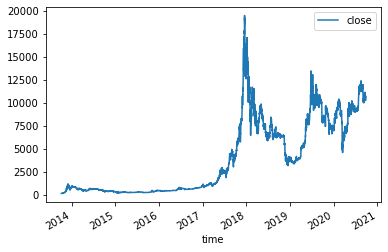

In [68]:
df_append_9.plot()

In [ ]:
def get_prices(exchange, trading_pairs_df, interval, start):
    master_prices_df = pd.DataFrame()
    for index, row in trading_pairs_df.iterrows():
        candles = shrimpy_client.get_candles(exchange, row['base'], row['quote'], interval, start)
        time = []
        prices = []
        for key, value in enumerate(candles):
            time.append(value['time'])
            prices.append(value['close'])
        prices_df = pd.DataFrame(list(zip(time, prices)), columns = ['time', row['base'] + "_" + row['quote']])
        prices_df['time'] = pd.to_datetime(prices_df['time'])
        if master_prices_df.empty:
            master_prices_df = prices_df
        else:
            master_prices_df = pd.merge(master_prices_df, prices_df, left_on='time', right_on = 'time', how = 'left')
    return master_prices_df

In [9]:
users = shrimpy_client.list_users()

In [10]:
users

[]

In [7]:
df_kucoin_pairs_btc = df_kucoin_pairs[df_kucoin_pairs['quote']=='BTC']
df_kucoin_pairs_btc

,base,quote
0,REQ,ETH
1,REQ,BTC
2,NULS,ETH
3,NULS,BTC
4,CVC,BTC
...,...,...
479,BTT,ETH
480,SOLVE,BTC
481,GRIN,BTC
482,GRIN,ETH
